<a href="https://colab.research.google.com/github/Muyiiwa/machine-learning/blob/main/Fitbit_feature_engineering_sleep__unsupervised_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# relevant packages
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import shap
import datetime
import time
from datetime import datetime
from datetime import timedelta
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
# from sklearn.trees import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [ ]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# read data
df = pd.read_csv('Eva_data_AB.csv', header=0)
# data = data.dropna()
print(df.shape)
print(list(df.columns))

(7353, 58)
['v1', 'id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2', 'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage', 'exertion_points_percentage', 'responsiveness_points_percentage', 'daily_temperature_variation', 'badgetype', 'calories', 'filtereddemographicvo2max', 'distance', 'activitytype', 'bpm', 'lightly_active_minutes', 'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes', 'mindfulness_session', 'scl_avg', 'resting_hr', 'sleep_duration', 'minutestofallasleep', 'minutesasleep', 'minutesawake', 'minutesafterwakeup', 'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps', 'minutes_in_default_zone_1', 'minutes_below_default_zone_1', 'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age', 'gender', 'bmi', 'heart_rate_alert', 'age_num', 'gender_num', 'bmi_num', 'id_num', 'over29age', 'female', 'over24bmi', 'id_day', 'missing', 'nomissing', 'propor_miss', 'female29plus'

In [ ]:
steps = df[[ 'steps','moderately_active_minutes', 'very_active_minutes','sleep_duration' ,'lightly_active_minutes', 'calories', 'minutes_in_default_zone_1', 'exertion_points_percentage',
'minutes_in_default_zone_2', 'nremhr', 'sedentary_minutes','moderately_active_minutes' ,'age' ,'over29age', 'female', 'female29plus', 'propor_miss', 'female29plus', 'female_promiss']]

# remove all NaNs from steps dataset
stepsnm = steps[~steps.isin([np.nan, np.inf, -np.inf]).any(1)]

# inspect resulting dataset
stepsnm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1567 entries, 0 to 7333
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   steps                       1567 non-null   float64
 1   moderately_active_minutes   1567 non-null   float64
 2   very_active_minutes         1567 non-null   float64
 3   sleep_duration              1567 non-null   float64
 4   lightly_active_minutes      1567 non-null   float64
 5   calories                    1567 non-null   float64
 6   minutes_in_default_zone_1   1567 non-null   float64
 7   exertion_points_percentage  1567 non-null   float64
 8   minutes_in_default_zone_2   1567 non-null   float64
 9   nremhr                      1567 non-null   float64
 10  sedentary_minutes           1567 non-null   float64
 11  moderately_active_minutes   1567 non-null   float64
 12  age                         1567 non-null   object 
 13  over29age                   1567 

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (replace NaN with mean, for example)
df.fillna(df.mean(), inplace=True)


v1                                     0
id                                     0
date                                   0
nightly_temperature                 3994
nremhr                              4878
rmssd                               4878
spo2                                6083
full_sleep_breathing_rate           4858
stress_score                        5477
sleep_points_percentage             5477
exertion_points_percentage          5477
responsiveness_points_percentage    5477
daily_temperature_variation         4049
badgetype                           6838
calories                             693
filtereddemographicvo2max           2560
distance                            2576
activitytype                        5140
bpm                                 2549
lightly_active_minutes               270
moderately_active_minutes            270
very_active_minutes                  270
sedentary_minutes                    270
mindfulness_session                  242
scl_avg         

In [ ]:
selected_features = ['moderately_active_minutes', 'very_active_minutes', 'lightly_active_minutes', 'minutes_in_default_zone_1', 'exertion_points_percentage',
                      'minutes_in_default_zone_2', 'nremhr', 'sedentary_minutes', 'calories', 'female', 'over29age', 'female29plus']
X = df[selected_features]
y = df['sleep_duration']

In [ ]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Support Vector Machine (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)


In [ ]:
# Check Serial-Correlation
residuals_linear = y_test - y_pred_linear
residuals_rf = y_test - y_pred_rf
residuals_svr = y_test - y_pred_svr


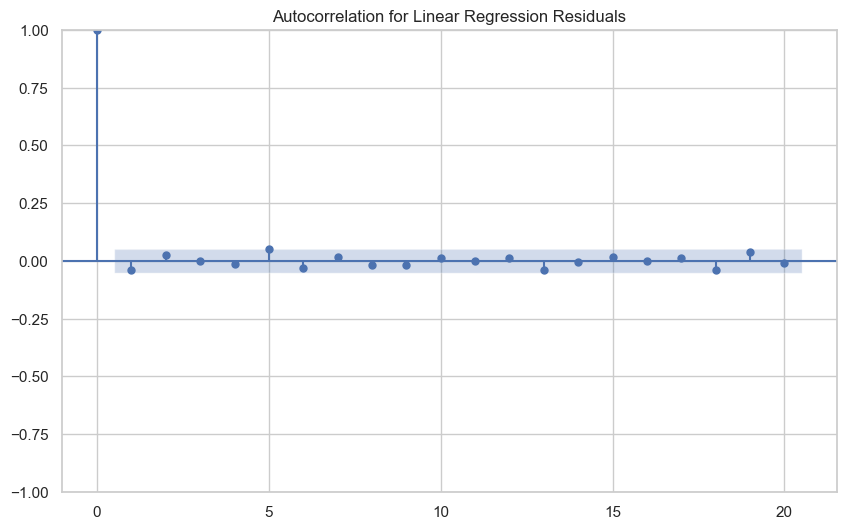

In [ ]:
# Optionally, plot autocorrelation function
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals_linear, lags=20, ax=ax)
plt.title('Autocorrelation for Linear Regression Residuals')
plt.show()


In [ ]:
# Train-Test Splits (80-20 and 90-10) for Linear Regression
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
# Train Linear Regression model on 90-10 split
model_linear_90 = LinearRegression()
model_linear_90.fit(X_train_90, y_train_90)
y_pred_linear_90 = model_linear_90.predict(X_test_90)


In [ ]:
# Calculate Mean Squared Error for Linear Regression
mse_linear = mean_squared_error(y_test_90, y_pred_linear_90)


In [ ]:
# Evaluate impact of ages and sex
coefficients_linear = pd.DataFrame({'Coefficient': model_linear_90.coef_, 'Feature': selected_features})
coefficients_linear.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients_linear)


     Coefficient                     Feature
4   1.739761e+06  exertion_points_percentage
11  7.553269e+05                female29plus
9   4.008673e+05                      female
5   4.436499e+03   minutes_in_default_zone_2
8  -5.696753e+01                    calories
3  -4.301986e+02   minutes_in_default_zone_1
7  -9.911649e+03           sedentary_minutes
1  -1.190589e+04         very_active_minutes
0  -1.741652e+04   moderately_active_minutes
2  -2.365150e+04      lightly_active_minutes
6  -7.250776e+04                      nremhr
10 -8.059196e+05                   over29age


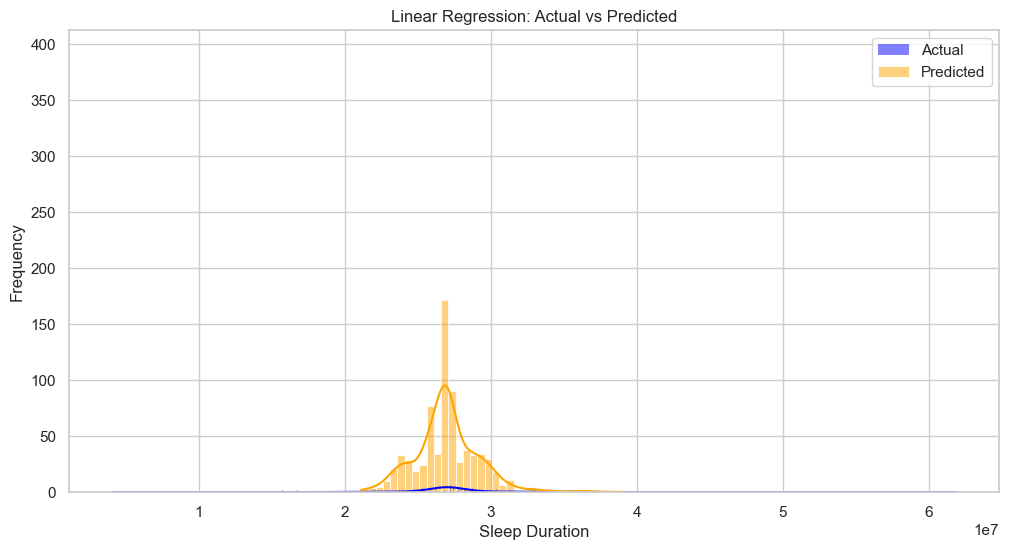

In [ ]:
# Visualize outcomes with histograms
plt.figure(figsize=(12, 6))
sns.histplot(y_test_90, label='Actual', kde=True, color='blue')
sns.histplot(y_pred_linear_90, label='Predicted', kde=True, color='orange')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.legend()
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [ ]:
# Compare Scores between different algorithms
score_linear = model_linear_90.score(X_test_90, y_test_90)
score_rf = rf_model.score(X_test_90, y_test_90)
score_svr = svr_model.score(X_test_90, y_test_90)

In [ ]:
print(f'Linear Regression Score: {score_linear}')
print(f'Random Forest Score: {score_rf}')
print(f'SVR Score: {score_svr}')


Linear Regression Score: 0.21255209145148068
Random Forest Score: 0.7098159377376255
SVR Score: -0.0006542667465581076


In [ ]:
# Plot feature importances for Random Forest
feature_importances_rf = pd.DataFrame({'Feature': selected_features, 'Importance': rf_model.feature_importances_})
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

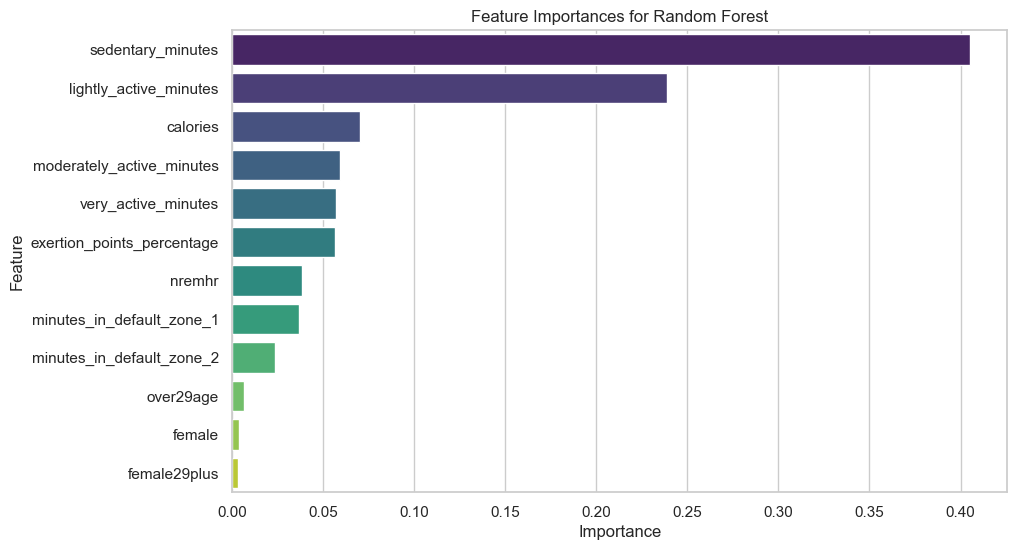

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf, palette='viridis')
plt.title('Feature Importances for Random Forest')
plt.show()

In [ ]:
# Features and target variable
selected_features = ['moderately_active_minutes', 'very_active_minutes', 'lightly_active_minutes', 'minutes_in_default_zone_1', 'exertion_points_percentage',
                      'minutes_in_default_zone_2', 'nremhr', 'sedentary_minutes', 'calories', 'female', 'over29age', 'female29plus']
X = df[selected_features]
y = df['sleep_duration']

In [ ]:
# Add an interaction term between 'female' and 'over29age'
X['female_age_interaction'] = X['female'] * X['over29age']


In [ ]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [ ]:
# Check Serial-Correlation
residuals_linear = y_test - y_pred_linear

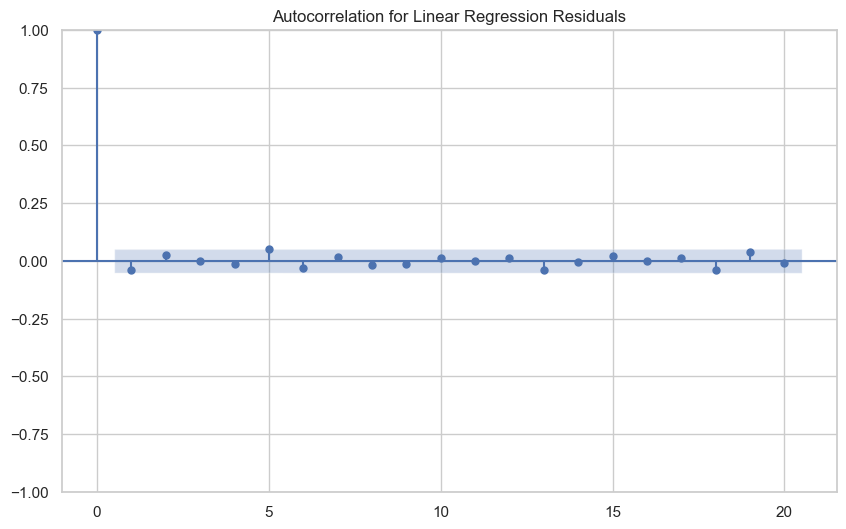

In [ ]:
# Optionally, plot autocorrelation function
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals_linear, lags=20, ax=ax)
plt.title('Autocorrelation for Linear Regression Residuals')
plt.show()

In [ ]:
# Train-Test Splits (80-20 and 90-10) for Linear Regression
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Train Linear Regression model on 90-10 split
model_linear_90 = LinearRegression()
model_linear_90.fit(X_train_90, y_train_90)
y_pred_linear_90 = model_linear_90.predict(X_test_90)


In [ ]:
# Evaluate impact of ages and sex
coefficients_linear = pd.DataFrame({'Coefficient': model_linear_90.coef_, 'Feature': X.columns})
coefficients_linear.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients_linear)


     Coefficient                     Feature
12  3.426320e+06      female_age_interaction
4   1.739441e+06  exertion_points_percentage
9   3.067719e+05                      female
5   4.217420e+03   minutes_in_default_zone_2
8  -8.466911e+01                    calories
3  -3.990698e+02   minutes_in_default_zone_1
7  -9.871890e+03           sedentary_minutes
1  -1.178925e+04         very_active_minutes
0  -1.757010e+04   moderately_active_minutes
2  -2.342510e+04      lightly_active_minutes
6  -7.250725e+04                      nremhr
10 -8.392636e+05                   over29age
11 -2.596655e+06                female29plus


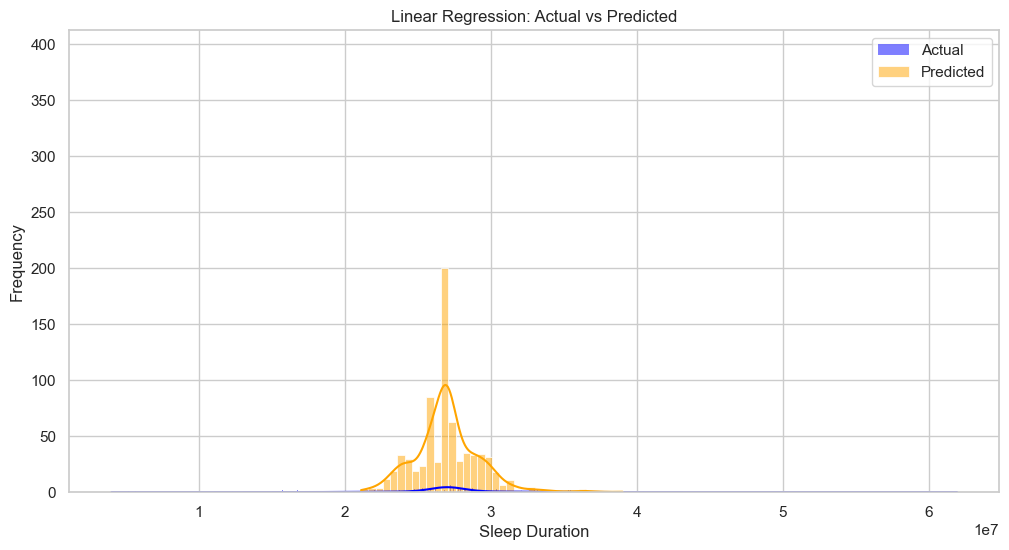

In [ ]:
# Visualize outcomes with histograms
plt.figure(figsize=(12, 6))
sns.histplot(y_test_90, label='Actual', kde=True, color='blue')
sns.histplot(y_pred_linear_90, label='Predicted', kde=True, color='orange')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.legend()
plt.title('Linear Regression: Actual vs Predicted')
plt.show()